In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:\\GESAD\\Inputs\\tabela6805_BA.csv") # Dados - sidra IBGE
df.head()

,Cód,Município,Total,"Rede geral, rede pluvial ou fossa ligada à rede",Rede geral ou pluvial,Fossa séptica ou fossa filtro ligada à rede,Fossa séptica ou fossa filtro não ligada à rede,Fossa rudimentar ou buraco,Vala,"Rio, lago, córrego ou mar",Outra forma,Não tinham banheiro nem sanitário
0,2900108,Abaíra (BA),2722,672,653,19,141,1890,4,3,5,7
1,2900207,Abaré (BA),5545,2960,2856,104,1048,685,296,13,125,418
2,2900306,Acajutiba (BA),4768,9,8,1,442,4281,9,-,15,12
3,2900355,Adustina (BA),5207,2130,2125,5,16,2768,49,19,46,179
4,2900405,Água Fria (BA),5448,259,182,77,121,4623,88,56,223,78


In [5]:
# Lista dos municípios que têm até 20 mil hab
mun = pd.read_csv("C:\\GESAD\\Inputs\\dictBA.csv") 
cod = mun.columns.tolist() 
len(cod)

257

In [6]:
# Limitar dataframe deixando apenas municípios com até 20 mil hab
for i in range(len(df['Cód'])):
    if str(df['Cód'][i]) not in cod:
        df.drop(index=i, inplace=True)    
df.reset_index(drop=True, inplace=True)
df.replace('-', 0, inplace=True) 
df

,Cód,Município,Total,"Rede geral, rede pluvial ou fossa ligada à rede",Rede geral ou pluvial,Fossa séptica ou fossa filtro ligada à rede,Fossa séptica ou fossa filtro não ligada à rede,Fossa rudimentar ou buraco,Vala,"Rio, lago, córrego ou mar",Outra forma,Não tinham banheiro nem sanitário
0,2900108,Abaíra (BA),2722,672,653,19,141,1890,4,3,5,7
1,2900207,Abaré (BA),5545,2960,2856,104,1048,685,296,13,125,418
2,2900306,Acajutiba (BA),4768,9,8,1,442,4281,9,0,15,12
3,2900355,Adustina (BA),5207,2130,2125,5,16,2768,49,19,46,179
4,2900405,Água Fria (BA),5448,259,182,77,121,4623,88,56,223,78
...,...,...,...,...,...,...,...,...,...,...,...,...
252,2933158,Várzea Nova (BA),4860,2889,2886,3,50,1762,18,0,59,82
253,2933174,Varzedo (BA),3622,1066,1056,10,67,2369,41,27,21,31
254,2933257,Vereda (BA),2253,915,893,22,71,699,162,378,8,20
255,2933406,Wagner (BA),3280,26,22,4,109,3079,9,0,29,28


In [7]:
# String para float
categorias = df.columns.tolist() 
categorias.pop(1)

for i in range(len(categorias)):
    if categorias[i] in df.columns.tolist():
        df[categorias[i]] = df[categorias[i]].astype(float) 
        
# Nova coluna
df['Outros'] = df['Vala']+df['Rio, lago, córrego ou mar']+df['Outra forma']+df['Não tinham banheiro nem sanitário']
df

,Cód,Município,Total,"Rede geral, rede pluvial ou fossa ligada à rede",Rede geral ou pluvial,Fossa séptica ou fossa filtro ligada à rede,Fossa séptica ou fossa filtro não ligada à rede,Fossa rudimentar ou buraco,Vala,"Rio, lago, córrego ou mar",Outra forma,Não tinham banheiro nem sanitário,Outros
0,2900108.0,Abaíra (BA),2722.0,672.0,653.0,19.0,141.0,1890.0,4.0,3.0,5.0,7.0,19.0
1,2900207.0,Abaré (BA),5545.0,2960.0,2856.0,104.0,1048.0,685.0,296.0,13.0,125.0,418.0,852.0
2,2900306.0,Acajutiba (BA),4768.0,9.0,8.0,1.0,442.0,4281.0,9.0,0.0,15.0,12.0,36.0
3,2900355.0,Adustina (BA),5207.0,2130.0,2125.0,5.0,16.0,2768.0,49.0,19.0,46.0,179.0,293.0
4,2900405.0,Água Fria (BA),5448.0,259.0,182.0,77.0,121.0,4623.0,88.0,56.0,223.0,78.0,445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2933158.0,Várzea Nova (BA),4860.0,2889.0,2886.0,3.0,50.0,1762.0,18.0,0.0,59.0,82.0,159.0
253,2933174.0,Varzedo (BA),3622.0,1066.0,1056.0,10.0,67.0,2369.0,41.0,27.0,21.0,31.0,120.0
254,2933257.0,Vereda (BA),2253.0,915.0,893.0,22.0,71.0,699.0,162.0,378.0,8.0,20.0,568.0
255,2933406.0,Wagner (BA),3280.0,26.0,22.0,4.0,109.0,3079.0,9.0,0.0,29.0,28.0,66.0


In [8]:
# Escolher rótulos do gráfico
categorias = categorias[3:7]
categorias.append('Outros')
categorias

['Rede geral ou pluvial',
 'Fossa séptica ou fossa filtro ligada à rede',
 'Fossa séptica ou fossa filtro não ligada à rede',
 'Fossa rudimentar ou buraco',
 'Outros']

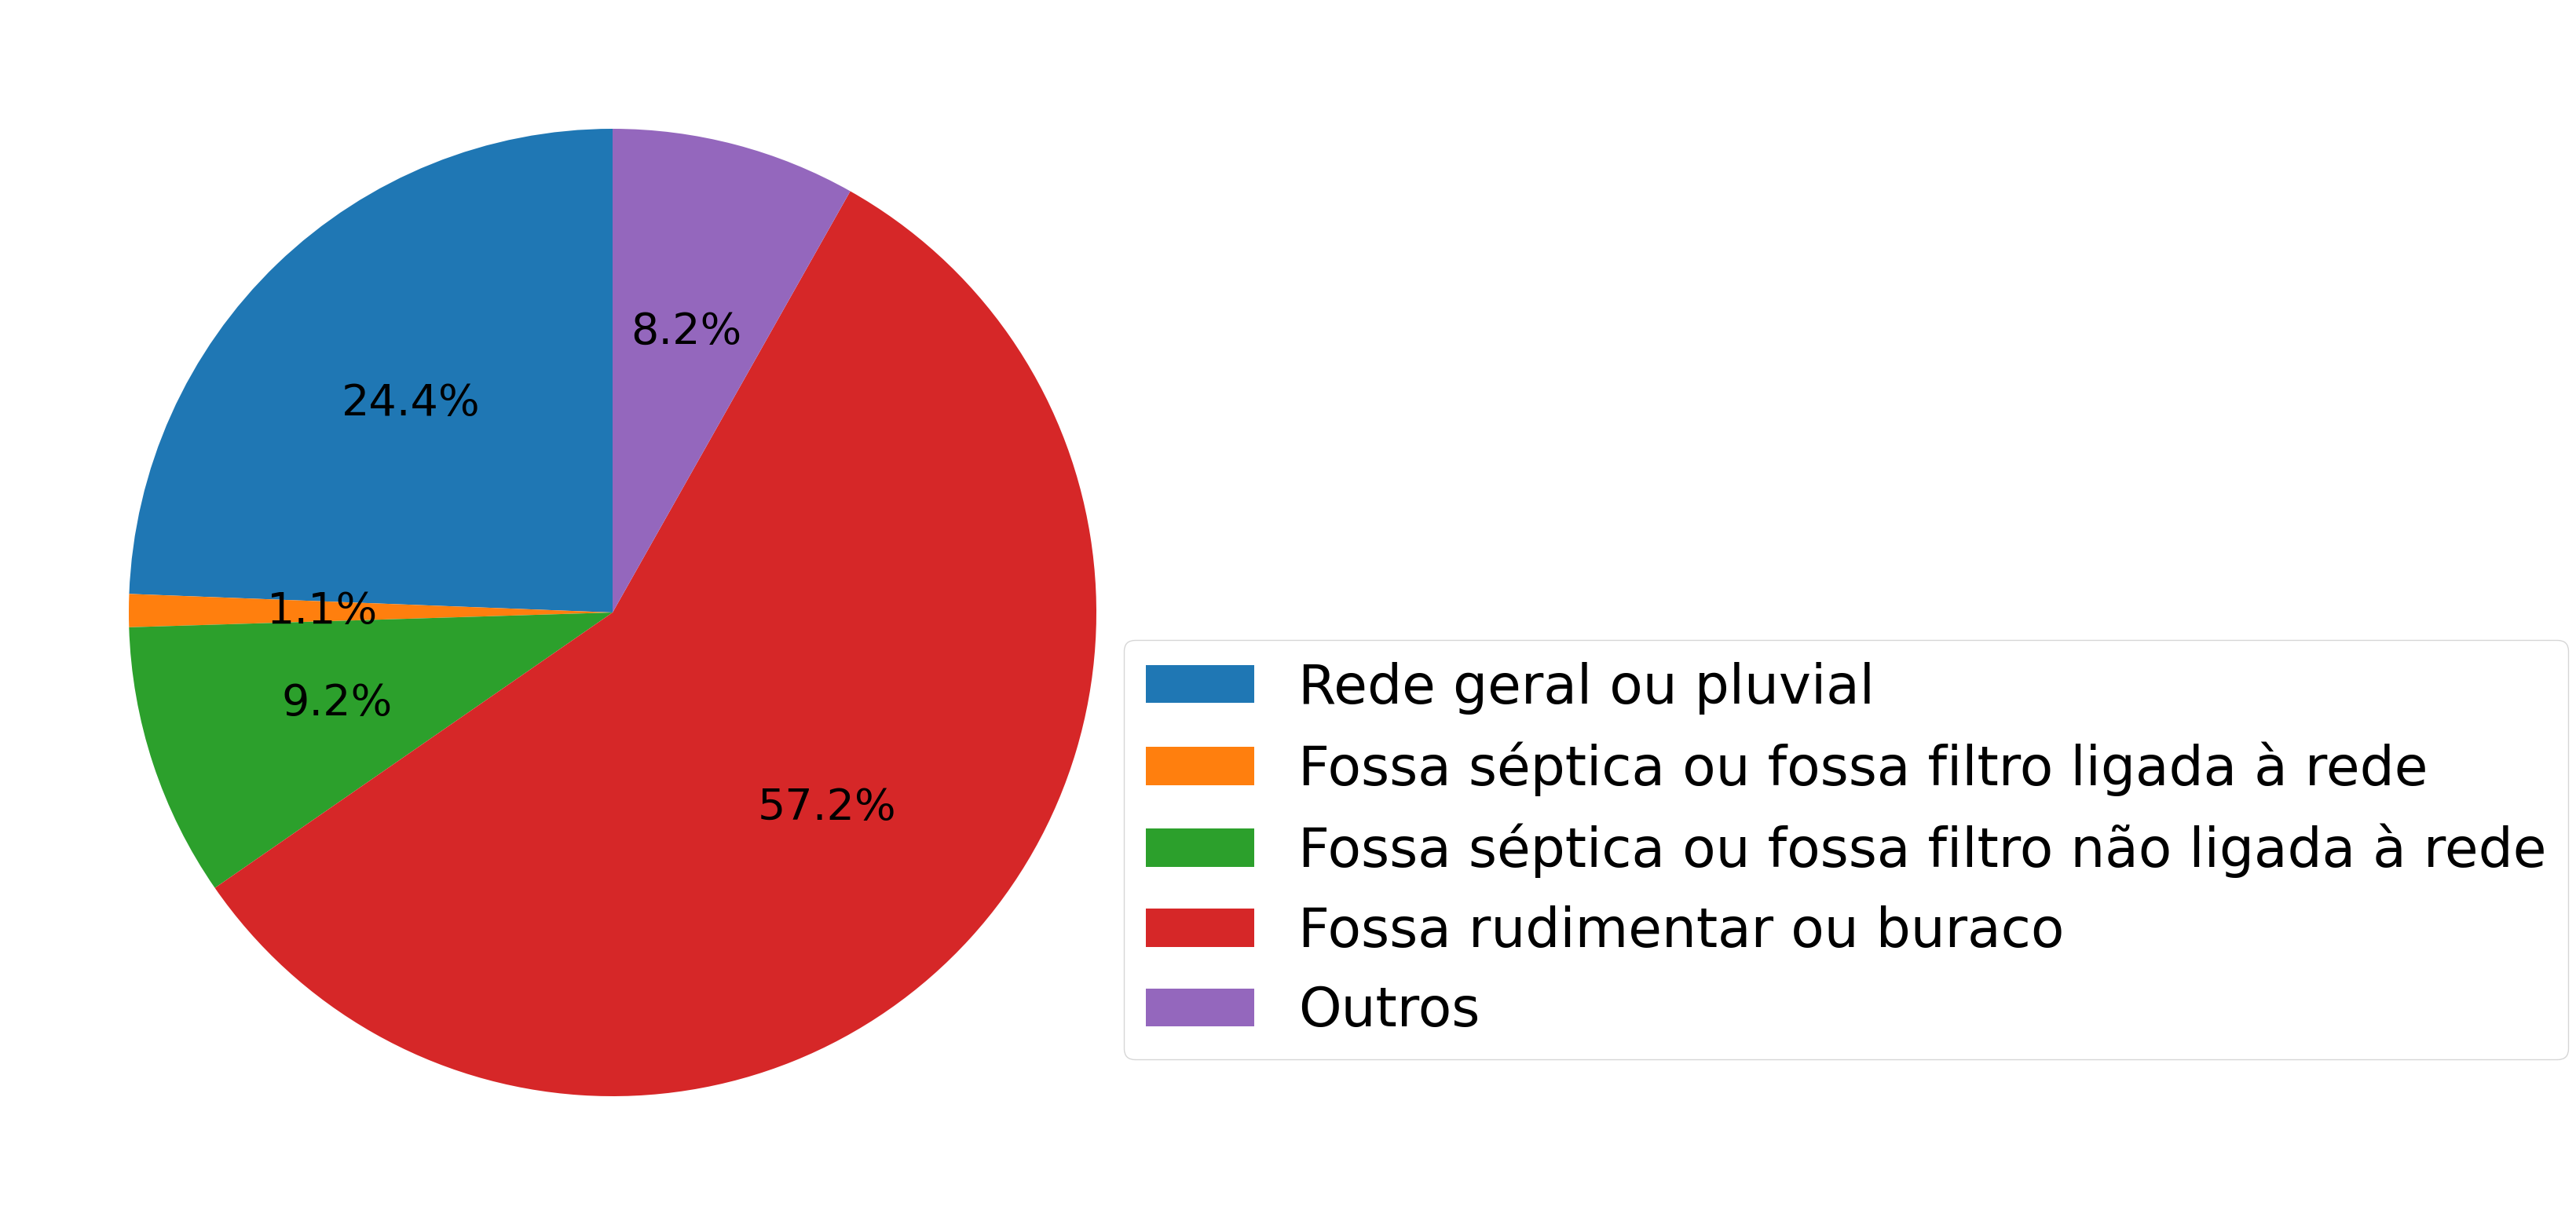

In [9]:
# Gráfico de pizza dos municípios que têm até 20 mil hab
valores = []
for i in range(len(categorias)):
    valores.append(df[categorias[i]].sum()) 

plt.figure(figsize=(20,20))  
plt.pie(valores, autopct='%1.1f%%', startangle=90)
plt.setp(plt.gca().texts, fontsize=40) 
plt.legend(categorias, fontsize=50, bbox_to_anchor=(0.9, 0.5))

plt.savefig('BA.png', bbox_inches='tight')
plt.show()